In [17]:
import os

csv_files = []

for root, dirs, files in os.walk('cleaned_data'):
    for filename in files:
        if filename.find('csv') < 0:
            continue
        else:
            csv_files.append(os.path.join(root, filename))

In [23]:
import csv
contents = {}
for filename in csv_files:
    year = int(filename.split('/')[-1].split('.')[0])
    
    with open(filename) as handle:
        csv_reader = csv.reader(handle, delimiter=',', quotechar='"')
        for i, row in enumerate(csv_reader):
            if i == 0:
                continue
            else:
                if year in contents:
                    contents[year].append(row)
                else:
                    contents[year] = [row]
                    

In [30]:
song_title_words_freqs = {}
import string
exclude = set(string.punctuation)

for year, songs in contents.iteritems():
    for song in songs:
        if len(song) < 3:
            continue
        rank, artist, title = song
        title_cleaned = ''.join(ch for ch in title if ch not in exclude)
        title_toks = title_cleaned.split(' ')
        title_lower_toks = [x.lower() for x in title_toks]
        
        for tok in title_lower_toks:
            if tok in song_title_words_freqs:
                song_title_words_freqs[tok] += 1
            else:
                song_title_words_freqs[tok] = 1



{'': 63, 'phunk': 1, 'hats': 1, 'personally': 1, 'yellow': 8, 'four': 2, 'breakout': 1, 'sleep': 8, 'spiders': 1, 'mirage': 1, 'mansion': 1, 'captain': 1, 'saved': 1, 'yonder': 2, 'goldfinger': 1, 'swag': 1, 'patches': 2, '1203': 1, 'auf': 1, 'paris': 2, 'dazz': 1, 'sweetest': 4, 'presents': 1, 'swat': 1, 'according': 1, 'under': 3, 'lord': 2, 'sorry': 9, 'pride': 1, 'worth': 4, 'playground': 2, 'callin': 1, 'point': 1, 'rescue': 1, 'dollar': 1, 'rise': 2, 'misunderstanding': 1, 'manic': 1, 'smack': 2, 'every': 21, 'jack': 5, 'chapel': 4, 'starships': 1, 'poppa': 1, 'school': 6, 'daydream': 3, 'wooden': 1, 'loneliness': 2, 'frozen': 1, 'oooh': 1, 'venus': 4, 'humps': 2, 'ups': 1, 'clothes': 3, 'enjoy': 2, 'jamaica': 1, 'paperback': 1, 'force': 1, 'tired': 3, 'corvette': 1, 'hanging': 2, 'lavender': 1, 'second': 3, 'street': 7, 'umbrella': 1, 'n': 11, 'shining': 2, 'blue': 37, 'nel': 2, 'thunder': 1, 'boogie': 14, 'fingers': 2, 'poison': 4, 'sung': 1, 'lights': 12, 'maneater': 1, 'above

In [35]:
import operator
sorted_toks = sorted(song_title_words_freqs.items(), key=operator.itemgetter(1))

In [46]:
#rank-freq plots
rank_freq = {}
for term, freq in sorted_toks:
    if freq in rank_freq:
        rank_freq[freq] += 1
    else:
        rank_freq[freq] = 1
    
sorted_rank_freq = sorted(rank_freq.items(), key=operator.itemgetter(1))

import math
xs = [math.log(x[0],10) for x in sorted_rank_freq]
ys = [math.log(x[1],10) for x in sorted_rank_freq]

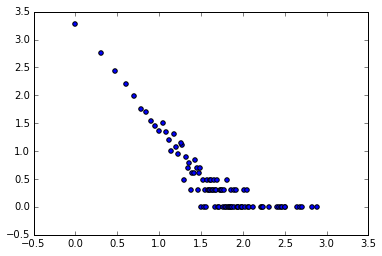

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(xs, ys)
plt.savefig('power_law.png')